In [33]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits=load_digits()

In [34]:
print("Image data shape",digits.data.shape)
print("Label data shape",digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


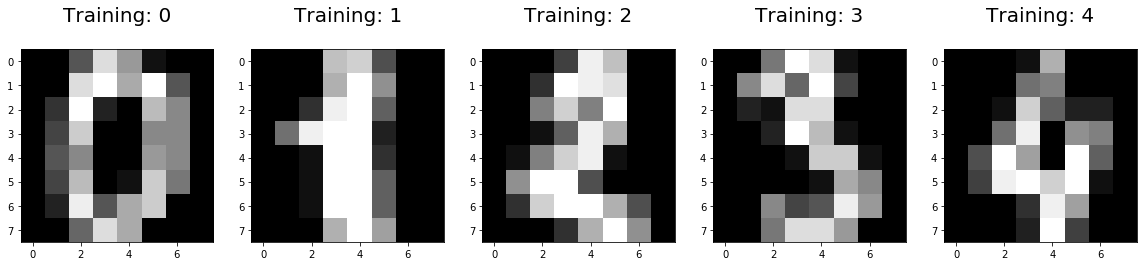

In [35]:
#import numpy as np
#import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training: %i\n" %label,fontsize=20)

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.20,random_state=0)

In [37]:
X_train.shape

(1437, 64)

In [38]:
X_test.shape

(360, 64)

In [39]:
y_train.shape

(1437,)

In [40]:
y_test.shape

(360,)

In [41]:
#ignore the warnings
import warnings
warnings.filterwarnings('ignore')
#apply the algorithm
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#predict for one observation(image)
print(lr.predict(X_test[0].reshape(1,-1)))

[2]


In [43]:
#few more images prediction
lr.predict(X_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [44]:
#predcting the test data
y_pred=lr.predict(X_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 8, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 1,
       3, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 8, 4, 1, 7, 0, 6, 1, 5, 5, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 8, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 8, 8, 9, 8, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 2, 8, 4, 2, 1, 6, 9, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 1, 6, 9, 3, 6, 3, 3, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 3, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [45]:
#accuracy of the data by using score method
score=lr.score(X_test,y_test)
score

0.95

In [47]:
#accuracy by using confusion matrix
cm=metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 31  0  0  0  0  1  0  3  0]
 [ 0  0 34  2  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  1  0  0  1  0  0 37  0  0]
 [ 0  2  1  0  0  0  0  0 35  1]
 [ 0  0  0  1  0  1  0  0  2 37]]


#in the above matrix 27,31,34 diagonals.the actual values same the predicted values
#and remaining 1,3,2 numbers are different values.they are not same as the actual and predicted values

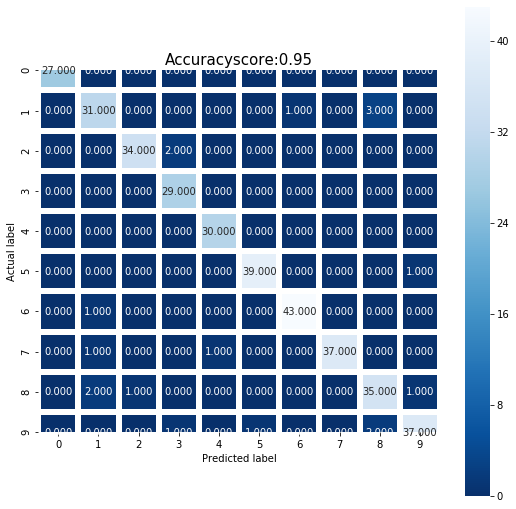

In [48]:
#we can visualize the actual and predicted values
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,fmt=".3f",linewidths=5,square=True,cmap="Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
all_sample_title='Accuracyscore:{0}'.format(score)
plt.title(all_sample_title,size=15);

Small example for logistic regression

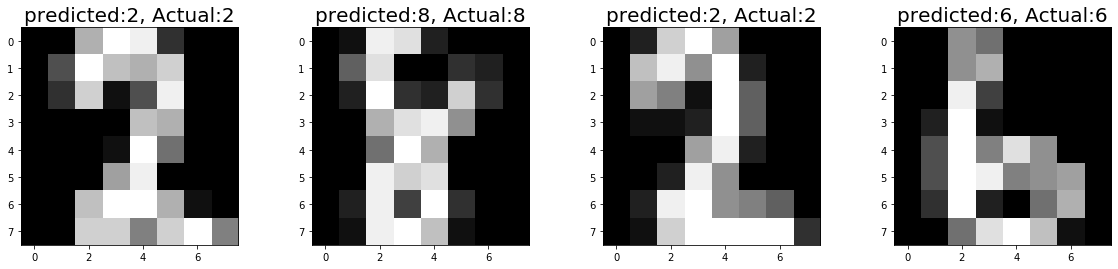

In [59]:
index=0
classfieldIndex=[]
for predict,actual in zip(y_pred,y_test):
    if predict==actual:
        classfieldIndex.append(index)
    index+=1
plt.figure(figsize=(20,4))
for plotIndex,wrong in enumerate(classfieldIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("predicted:{}, Actual:{}".format(y_pred[wrong],y_test[wrong]), fontsize=20)